In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re
import string

In [3]:
cd ..

/data/nasif12/home_if12/chengju/project/news


In [4]:
fkn = pd.read_pickle("./data/fkn_back.gzip")

In [62]:
fkn.head()

,index,title,text,label
0,8476,"[you, can, smell, hillari, fear]","[daniel, greenfield, shillman, journal, fellow...",1
1,10294,"[watch, the, exact, moment, paul, ryan, commit...","[googl, pinterest, digg, linkedin, reddit, stu...",1
2,3608,"[kerri, go, pari, gestur, sympathi]","[us, secretari, state, john, f, kerri, said, m...",0
3,10142,"[berni, support, twitter, erupt, anger, dnc, w...","[—, kayde, king, kaydeek, novemb, 9, 2016, the...",1
4,875,"[the, battl, new, york, whi, this, primari, ma...","[it, primari, day, new, york, frontrunn, hilla...",0


## Clean text data

## Pickle the output

In [111]:
#fkn.to_pickle("./data/fkn.gzip")

## Train validation test split

In [64]:
import numpy as np
import pandas as pd

def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.ix[perm[:train_end]]
    validate = df.ix[perm[train_end:validate_end]]
    test = df.ix[perm[validate_end:]]
    return train, validate, test

In [65]:
train_dt, validate_dt, test_dt = train_validate_test_split(fkn)

In [66]:
print("training shape", train_dt.shape)
print("validating shape", validate_dt.shape)
print("testing shape", test_dt.shape)

training shape (3801, 4)
validating shape (1267, 4)
testing shape (1267, 4)


In [57]:
from src.helper import save_sparse_csr

In [58]:
save_sparse_csr("./data/X_train_tfidf", X_train_tfidf)
save_sparse_csr("./data/X_val_tfidf", X_val_tfidf)
save_sparse_csr("./data/X_test_tfidf", X_test_tfidf)

In [59]:
np.save("./data/y_train", y_train)
np.save("./data/y_val", y_val)
np.save("./data/y_test", y_test)

In [144]:
# X_train_tfidf = load_sparse_csr("./data/X_train_tfidf.npz")
# X_val_tfidf = load_sparse_csr("./data/X_val_tfidf.npz")
# X_test_tfidf = load_sparse_csr("./data/X_test_tfidf.npz")

In [48]:
X_train_counts.sum(0)[X_train_counts.sum(0) == 3]

matrix([[3, 3, 3, ..., 3, 3, 3]], dtype=int64)

## world could 

In [8]:
fkn1 = fkn[fkn["label"] == 1]

In [9]:
texts = fkn1["text"]
texts = texts.apply(lambda x: " ".join(x))

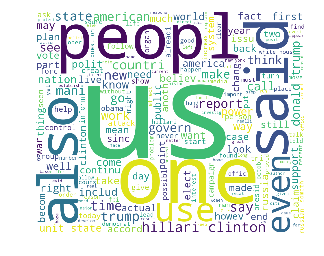

In [10]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(texts))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()